<a href="https://colab.research.google.com/github/rominicky/mineria-texto-python/blob/main/ulrich_exploraciones_textuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook diseñada para el Laboratorio de investigaciones en Humanidades Digitales - CONICET sobre el texto [Viaje al Río de la Plata de Ulrico Schmidel](https://github.com/hdlabconicet/viaje-al-rio-de-la-plata)

### Por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

Esta notebook tiene como objetivo trabajar sobre el texto en formato plano realizado para el proyecto [Viaje al Río de la Plata de Ulrico Schmidel](https://github.com/hdlabconicet/viaje-al-rio-de-la-plata). Con este se buscó generar visualizaciones del análisis textual, así como en las relaciones entre personajes, pueblos originarios en los trayectos y episodios de esta crónica.
Para ello se utilizaron diversas librerías de Spacy, NLTK, Pandas, MatPlot, Seaborn, entre otras, y se realizará una sucinta descripción a lo largo del código sobre cada una de ellas.

### Instalación y llamado de librerías y módulos

In [ ]:
!pip install spacy #librería SpaCy útil para análisis textual

!pip install networkx matplotlib #librería para generar visualizaciones estáticas, animadas e interactivas

In [ ]:
!python -m spacy download es_core_news_lg #Descarga del modelo de entrenamiento y procesado de textos para el español, md indica modelo de tamaño mediano

In [ ]:
#Librerías y módulos para generar visualizaciones

import matplotlib.pyplot as plt
import seaborn as sns

### Carga de texto

In [ ]:
# Cargamos el texto desde GitHub
#Requests librería para importar url
import requests

#función para descardar desde una url y con advertencia si existe error en el sitio web
def download_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Excepciones por error de acceso
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error de descarga de la URL: {e}")
        return None

url = "https://raw.githubusercontent.com/hdlabconicet/viaje-al-rio-de-la-plata/refs/heads/main/assets/ulrico_schmidl.txt"
ulrico_txt = download_text_from_url(url)

if ulrico_txt:
    print(ulrico_txt[:100])

else:
    print("Error al tratar de descargar el archivo") #advertencia que no se puedo descargar el archivo


VIAJE DE ULRICH SCHMÍDEL AL RÍO DE LA PLATA ( AMÉRICA DEL SUD )

VIAJE DE ULRICH SCHMIDEL AL RÍO DE 


Para proceder con el análisis textual trabajaremos en el archivo de texto plano de la obra de Ulrico Schmidel, generado desde los archivos codificados en TEI-XML, para que no hubieses diferencias entre ambos.

### Limpieza y tokenización del texto


A las palabras vacías, stopwords, generales del idioma español se añadieron las más frecuentes que se pueden considerar a una primera vista del texto, denominadas 'stopwords del siglo XVI'.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Recursos de NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Stopwords para el español del siglo XVI, tal vez podría ampliarse más
stopwords_siglo_XVI = set({
    'aquel', 'sino', 'aun', 'así', 'à', 'á', 'i', 'o', 'ó', 'ò', 'aquella', 'aquelos', 'aquelas', 'hast', 'dende', 'dixo', 'dixeron', 'dixieron', 'assí', 'assi', 'desque', 'después', 'allí', 'día'
})

# Stopwords estándar y del siglo XVI
nltk_stopwords = set(stopwords.words('spanish'))
stopwords_completas = nltk_stopwords.union(stopwords_siglo_XVI)

# Función de limpieza del texto, se utiliza expresiones regulares para encontrar y eleminar determinadas cadenas de caracteres
def limpiar_texto(texto):
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.lower().split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

# Función para limpiar y tokenizar
def clean_and_tokenize(text):
    # Eliminar caracteres especiales y tokenizar
    tokens = word_tokenize(re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ]', ' ', text.lower()))
    # Filtrar stopwords
    tokens = [word for word in tokens if word not in stopwords_completas]
    return tokens

In [ ]:
#carga de texto para limpieza
text = ulrico_txt
texto_limpio = limpiar_texto(text)

# Guarda el texto limpio
with open('texto_limpio.txt', 'w', encoding='utf-8') as file:
    file.write(texto_limpio)

print("Archivo 'texto_limpio.txt' creado exitosamente.")
print(texto_limpio[:100])

Archivo 'texto_limpio.txt' creado exitosamente.
viaje ulrich schmídel río plata américa sud viaje ulrich schmidel río plata año cuenta nacido cristo


In [ ]:
texto = ulrico_txt
# Aplicar la función clean_and_tokenize
tokens = clean_and_tokenize(texto)

# Guardar los tokens en un archivo (como texto o como lista)
with open("ulrico_tokens.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(" ".join(tokens))  # Los tokens se guardan como texto

print("Tokens guardados en 'ulrico_tokens.txt'.")
print(tokens[:25])

Tokens guardados en 'ulrico_tokens.txt'.
['viaje', 'ulrich', 'schmídel', 'río', 'plata', 'américa', 'sud', 'viaje', 'ulrich', 'schmidel', 'río', 'plata', 'año', 'cuenta', 'nacido', 'cristo', 'amado', 'señor', 'redentor', 'ulerich', 'schmidel', 'straubing', 'visto', 'siguientes', 'naciones']


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
import spacy
import pandas as pd

nltk.download('punkt')  # Recursos para la tokenización
nltk.download('averaged_perceptron_tagger')  # Modelo para el etiquetado POS
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_lg")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Procesamiento con SpaCy
doc = nlp(texto)

# lista de tuplas (palabra, etiqueta POS)
datos = [(token.text, token.pos_) for token in doc]

# Conversión de la lista en un dataframe
df = pd.DataFrame(datos, columns=["Palabra", "Etiqueta_POS"])

# Guardado del DataFrame en CSV
df.to_csv("etiquetas_pos_ulrico.csv", index=False, encoding="utf-8")

print("Archivo CSV generado con éxito: etiquetas_pos_ulrico.csv")

print(df.head(20))

Archivo CSV generado con éxito: etiquetas_pos_ulrico.csv
     Palabra Etiqueta_POS
0      VIAJE         NOUN
1         DE          ADP
2     ULRICH        PROPN
3   SCHMÍDEL        PROPN
4         AL          ADP
5        RÍO        PROPN
6         DE          ADP
7         LA          DET
8      PLATA        PROPN
9          (        PUNCT
10   AMÉRICA          ADJ
11       DEL          ADP
12       SUD        PROPN
13         )        PUNCT
14      \n\n        SPACE
15     VIAJE         NOUN
16        DE          ADP
17    ULRICH        PROPN
18  SCHMIDEL        PROPN
19        AL          ADP


### Cálculo de etiquetas POS

In [ ]:
# Calculo de la cantidad de cada tipo de etiqueta POS
pos_counts = df['Etiqueta_POS'].value_counts()
pos_counts

,count
Etiqueta_POS,
NOUN,5324
ADP,4560
PUNCT,4441
DET,3640
VERB,3566
PRON,3336
PROPN,2607
ADV,1871
CCONJ,1774


### Cálculo de sustantivos, adjetivos y verbos más comunes según etiquetado POS

In [ ]:
# Función que trae palabras más frecuentes con etiqueta POS
def get_top_n_words(df, pos_tag, n=20):
    words = df[df['Etiqueta_POS'] == pos_tag]['Palabra'].value_counts().head(n)
    return words

# Más frecuentes según categoría gramatical
top_nouns = get_top_n_words(df, 'NOUN')
top_adjectives = get_top_n_words(df, 'ADJ')
top_verbs = get_top_n_words(df, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns)
print("\nAdjetivos más frecuentes:\n", top_adjectives)
print("\nVerbos más frecuentes:\n", top_verbs)


Sustantivos más frecuentes:
 Palabra
capitán    216
tierra     138
gente      128
pueblo     124
agua       102
días       100
millas      94
hombres     93
leguas      93
ciudad      80
navíos      80
camino      70
nación      65
tiempo      64
día         55
mujeres     55
viaje       51
navío       47
cosa        47
]           38
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
general      48
llamada      46
dicho        42
gran         33
llamado      32
grandes      28
grande       27
dichos       25
CAPÍTULO     22
largos       18
principal    17
buen         17
buena        17
turco        14
enteros      13
junto        13
seguida      12
largo        11
corriente    11
juntos       11
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
llegamos     71
tienen       48
hizo         44
comer        42
quedamos     34
hacer        28
tiene        27
marchamos    27
tenían       24
teníamos     24
dijo         23
llama        23
tenía        23
hacen        2

In [ ]:
#Cálculo de nombres y lugares en el texto de Viaje de Ulrich Schmídel al Río de la Plata
import spacy
# Cargar el modelo en español de spaCy
nlp_es = spacy.load("es_core_news_lg")
#función para encontrar nombre de personas y lugares
def find_names_and_places(text, language="es"):
    if language == "es":
        doc = nlp_es(text)
    else:
        raise ValueError("Error de idioma")

    names = []
    places = []
    for ent in doc.ents:
        if ent.label_ == "PER":
            names.append(ent.text)
        elif ent.label_ == "LOC" or ent.label_ == "GPE":
            places.append(ent.text)

    return names, places


text = ulrico_txt

#aplico la funcion al texto
spanish_names, spanish_places = find_names_and_places(text, language="es")

print("Nombres", spanish_names[:25])
print("Lugares:", spanish_places[:25])


Nombres ['Pietro Mandossa', 'Jacoben Welser de Niremburgo', 'Heinrich Paimen', 'Sannt Bartholomei', 'Pietro Manthossa', 'Jerg Manthossa', 'Pietro Manthossa', 'Jerg Manthossa', 'Heinrich Paimen', 'Heinrich Paimen', 'Hainrich Paimen', 'Jerg Manthossa', 'No', 'Jerg Manthossa', 'SANTIAGO\n\nDespués de', 'Jerg Manthossa', 'San Jacob', 'Polman', 'Fué', 'Pietro Manthossa', 'Hanss Ossorio', 'Juan de Osorio', 'Hans', 'Juan) Ossorio', 'Pietro Manthossa']
Lugares: ['SCHMIDEL AL RÍO DE LA PLATA', 'Ulerich Schmidel de Straubing', 'Andorff', 'Amberes', 'Hispaniam', 'España', 'Indiam', 'Indias', 'Andorf', 'Amberes', 'Hispania', 'Khalles', 'Cádiz', 'Khalles', 'Cádiz', 'Platta', 'Indiam', 'Indias', 'Españoles', 'Neerlandeses', 'Sajones', 'Sewastian Neithart', 'Rieo', 'Platta', 'Rieo']


# Gráficos

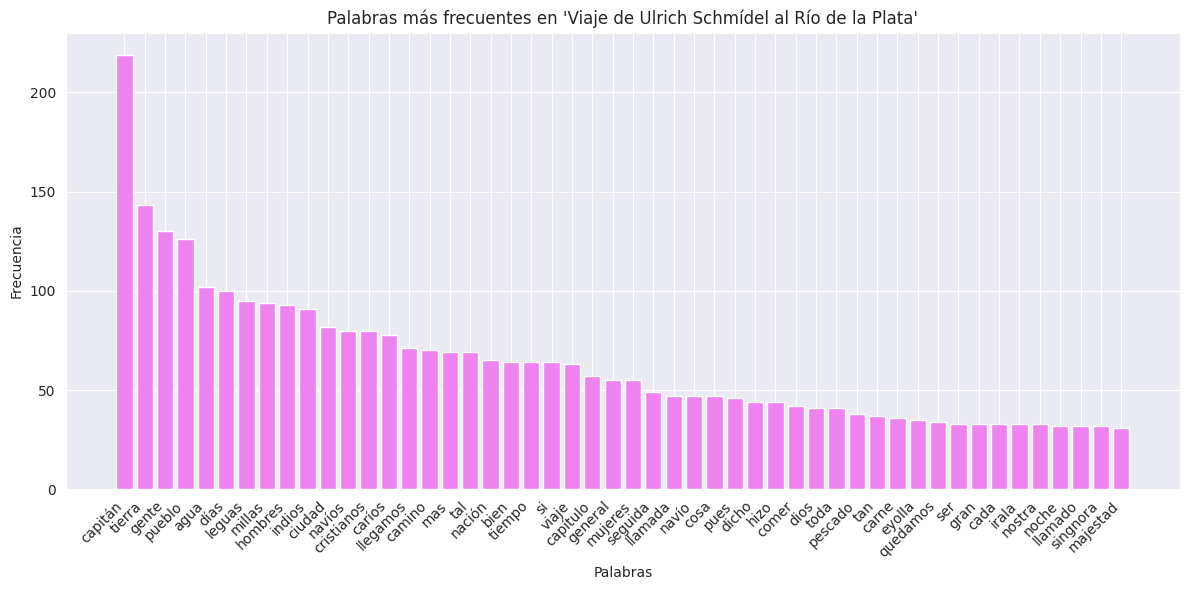

In [ ]:
# Gráfico de palabas más frecuentes en texto que fue procesado mediante limpieza

import matplotlib.pyplot as plt
from collections import Counter

# Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read()

# Tokenización
palabras = texto_limpio.split()

# Cálcilo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='violet')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Viaje de Ulrich Schmídel al Río de la Plata'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

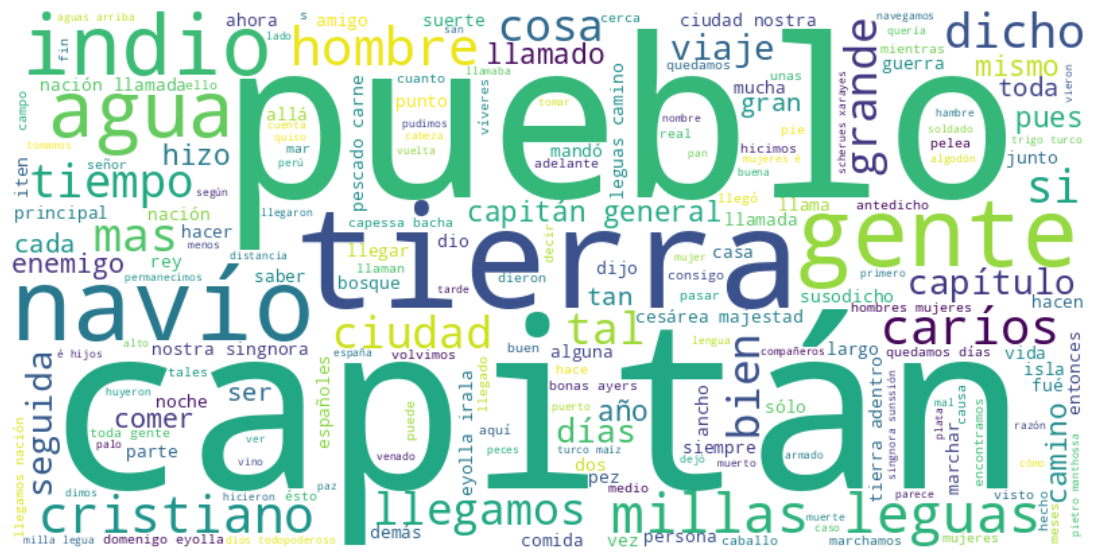

In [ ]:
# Nube de palabras de Viaje de Ulrich Schmídel al Río de la Plata

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lee el texto
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

# Muestra la nube de palabras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

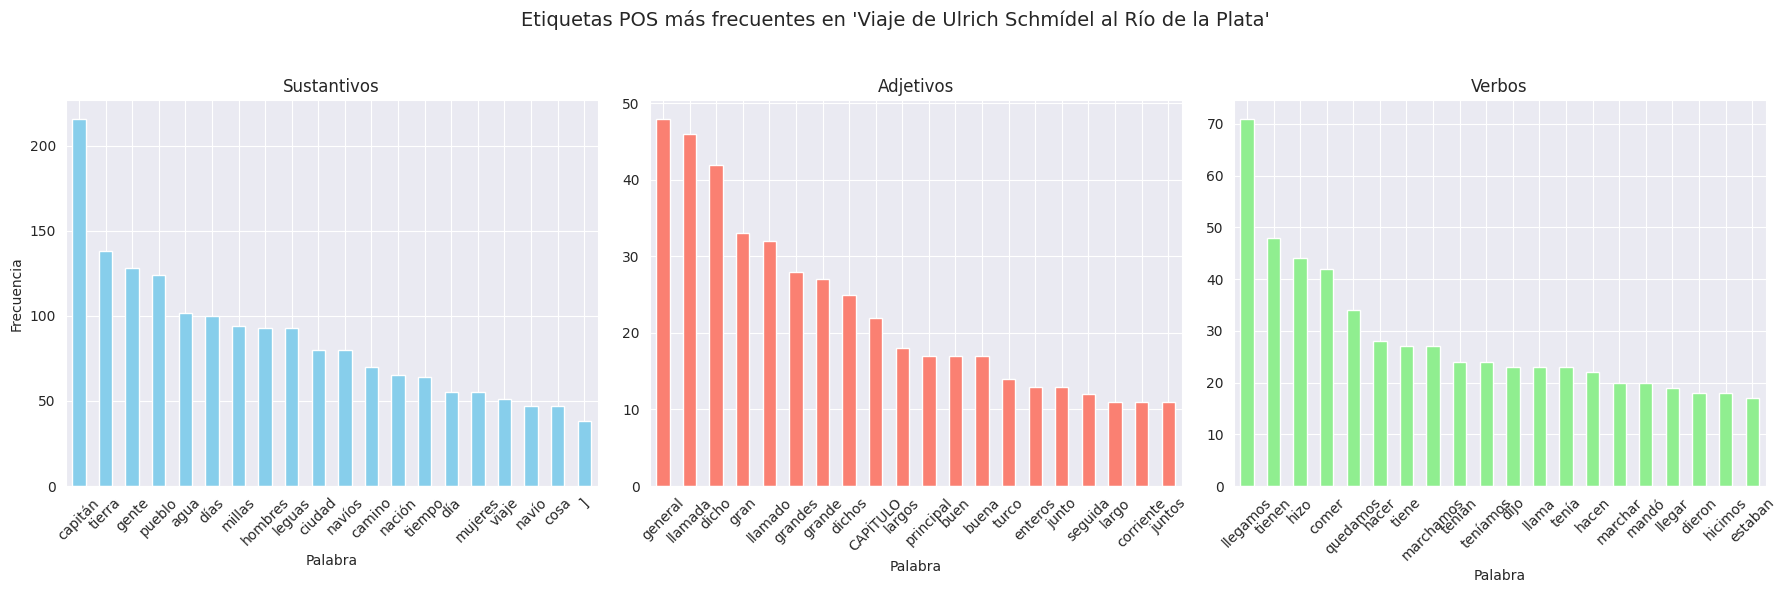

In [ ]:
sns.set_style("darkgrid")

# Tamaño de la figura
plt.figure(figsize=(18, 6))
plt.suptitle("Etiquetas POS más frecuentes en 'Viaje de Ulrich Schmídel al Río de la Plata'", fontsize=14)

# Gráfico de Sustantivos
ax1 = plt.subplot(1, 3, 1)
top_nouns.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Sustantivos', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de Adjetivos
ax2 = plt.subplot(1, 3, 2)
top_adjectives.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Adjetivos', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Gráfico de Verbos
ax3 = plt.subplot(1, 3, 3)
top_verbs.plot(kind='bar', color='lightgreen', ax=ax3)
ax3.set_title('Verbos', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

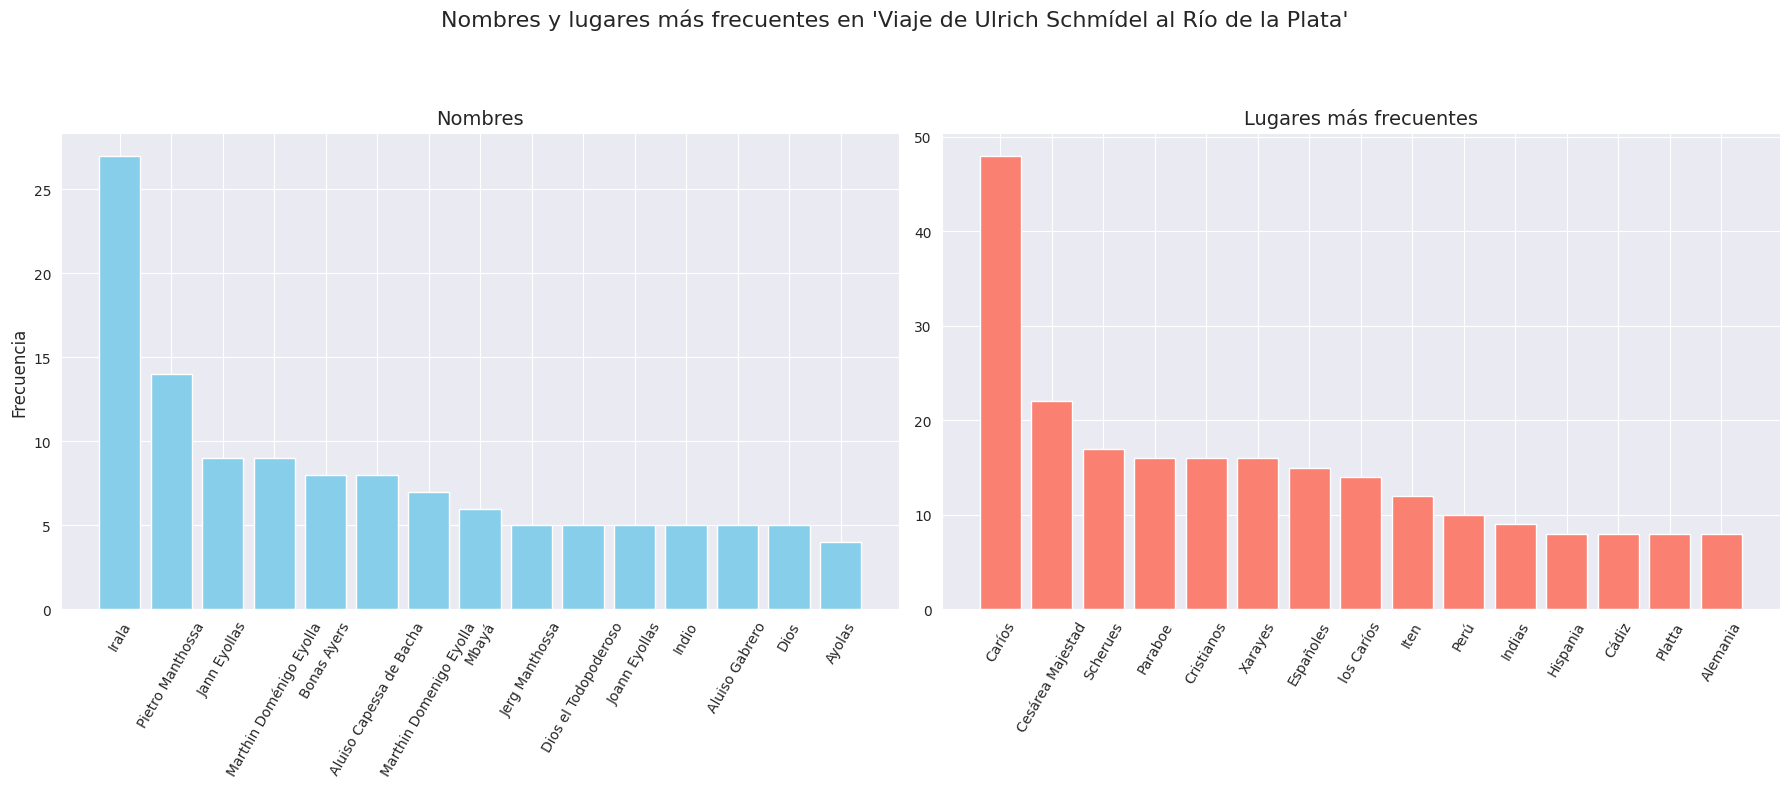

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Cálculo de la frecuencia de nombres y lugares
name_counts = Counter(spanish_names)
place_counts = Counter(spanish_places)

#Listas para graficar
names, name_freqs = zip(*name_counts.most_common(15))
places, place_freqs = zip(*place_counts.most_common(15))

# Tamaño de la figura
plt.figure(figsize=(18, 8))
plt.suptitle("Nombres y lugares más frecuentes en 'Viaje de Ulrich Schmídel al Río de la Plata'", fontsize=16)

# Gráfico de Nombres
ax1 = plt.subplot(1, 2, 1)
ax1.bar(names, name_freqs, color='skyblue', width=0.8)
ax1.set_title('Nombres', fontsize=14)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.tick_params(axis='x', rotation=60, labelsize=10)

# Gráfico de Lugares
ax2 = plt.subplot(1, 2, 2)
ax2.bar(places, place_freqs, color='salmon', width=0.8)
ax2.set_title('Lugares más frecuentes', fontsize=14)
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
